In [1]:
# Imports necesarios para el notebook
import random

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from codigo_PD import programacion_dinamica_sofia

from util import time_algorithm

# Siempre seteamos la seed de aleatoridad para que los # resultados sean reproducibles
random.seed(12345)
np.random.seed(12345)

sns.set_theme()

In [2]:
x = np.linspace(100, 2500, 20).astype(int)

def get_random_cant_monedas(s):
    # devuelve un array aleatorio de numeros mayores a 0 
    return [random.randint(1, 10000) for _ in range(s)]


results = time_algorithm(programacion_dinamica_sofia, x, lambda s: [get_random_cant_monedas(s)])

print(results)

{np.int64(100): 0.08325562477111817, np.int64(226): 0.19674997329711913, np.int64(352): 0.1008378505706787, np.int64(478): 0.8271384239196777, np.int64(605): 4.864213275909424, np.int64(731): 10.576832795143128, np.int64(857): 13.08955409526825, np.int64(984): 16.461564922332762, np.int64(1110): 22.425631856918336, np.int64(1236): 25.274473214149474, np.int64(1363): 30.227138495445253, np.int64(1489): 39.762310481071474, np.int64(1615): 46.25991508960724, np.int64(1742): 58.32742311954498, np.int64(1868): 80.6443861246109, np.int64(1994): 113.50718832015991, np.int64(2121): 153.882213807106, np.int64(2247): 162.36732840538025, np.int64(2373): 244.0567368745804, np.int64(2500): 172.0538117647171}


Text(0, 0.5, 'Tiempo de ejecución (s)')

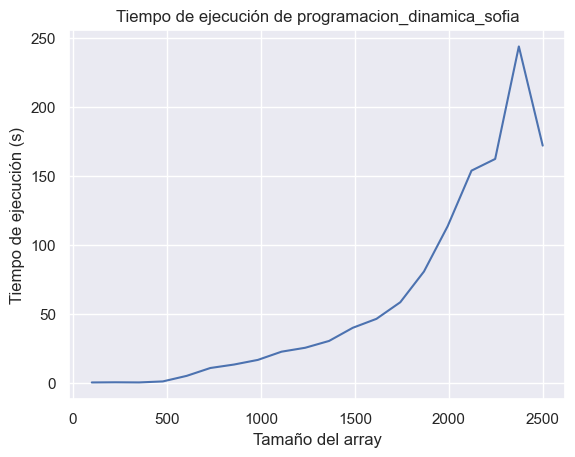

In [3]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución de programacion_dinamica_sofia')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')


In [4]:
f = lambda x, c1, c2: c1 * x**2 + c2

c, pcov = sp.optimize.curve_fit(f, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")
r = np.sum((c[0] * x**2 + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 3.3920245500751456e-05, c_2 = -15.533613866598163
Error cuadrático total: 9315.619593229932


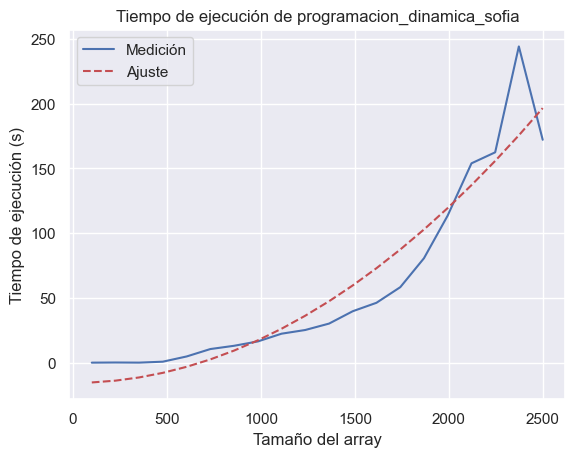

In [5]:
ax.plot(x, [c[0] * n**2 + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

Text(5, 20, 'ECT = 9315.619593229932s')

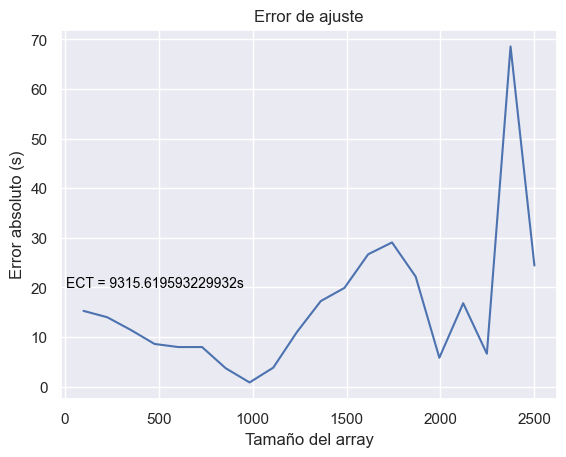

In [11]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n**2 + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
ax.text(5, 20, "ECT = " + str(9315.619593229932) + "s", fontsize=10, color="black")